In [1]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = 4000
pd.options.display.max_rows = 4000

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = pd.read_csv('../data/external/OnlineNewsPopularity/archive/OnlineNewsPopularity.csv')

In [3]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
col_list_to_category = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
                        'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday',
                        'data_channel_is_lifestyle', ' data_channel_is_entertainment', 'data_channel_is_bus',
                        'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']

data[col_list_to_category] = data[col_list_to_category].astype('category')

In [5]:
col_list_to_scale = ['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_self_hrefs', 
                     'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
                     'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess',
                     'num_imgs', 'num_videos', 'average_token_length', 'num_keywords']

scaler = StandardScaler()

data[col_list_to_scale] = scaler.fit_transform(data[col_list_to_scale])

In [6]:
# col_list_to_drop = ['url', 'timedelta', 'num_hrefs', 'num_self_hrefs',
#                     'data_channel_is_lifestyle', ' data_channel_is_entertainment',
#                     'data_channel_is_bus', 'data_channel_is_socmed',
#                     'data_channel_is_tech', 'data_channel_is_world',
#                     'kw_min_min', 'kw_max_min', 'kw_avg_min',
#                     'kw_min_max', 'kw_max_max', 'kw_avg_max',
#                     'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
#                     'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'is_weekend',
#                     'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
#                     'global_rate_positive_words', 'global_rate_negative_words',
#                     'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
#                     'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity']

col_list_to_drop = ['url', 'timedelta', 'is_weekend',
                    'data_channel_is_lifestyle', ' data_channel_is_entertainment',
                    'data_channel_is_bus', 'data_channel_is_socmed',
                    'data_channel_is_tech', 'data_channel_is_world',
                    'kw_min_min', 'kw_max_min', 'kw_avg_min',
                    'kw_min_max', 'kw_max_max', 'kw_avg_max',
                    'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
                    'num_hrefs', 'num_self_hrefs', 'num_keywords',
                    'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess',
                    'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
                    'abs_title_subjectivity', 'abs_title_sentiment_polarity']

col_set_to_drop = set(col_list_to_drop)
col_set_to_drop.intersection_update(set(data.columns))

if(col_set_to_drop):
    col_list_to_drop = list(col_set_to_drop)
    
    data = data.drop(col_list_to_drop, axis=1)

reordered_cols = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
                   'n_non_stop_words', 'n_non_stop_unique_tokens', 'average_token_length',
                   'global_subjectivity', 'global_sentiment_polarity',
                   'global_rate_positive_words', 'global_rate_negative_words',
                   'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
                   'min_positive_polarity', 'max_positive_polarity',
                   'avg_negative_polarity', 'min_negative_polarity',
                   'max_negative_polarity', 'title_subjectivity',
                   'title_sentiment_polarity', 'num_imgs', 'num_videos', 'weekday_is_monday',
                   'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
                   'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'shares']

data = data[reordered_cols]

data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,num_imgs,num_videos,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,shares
0,0.757447,-0.695210,0.663594,1.0,0.815385,0.156474,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,-0.426526,-0.304268,1.0,0.0,0.0,0.0,0.0,0.0,0.0,593
1,-0.661657,-0.618794,0.604743,1.0,0.791946,0.432838,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,-0.426526,-0.304268,1.0,0.0,0.0,0.0,0.0,0.0,0.0,711
2,-0.661657,-0.712192,0.575130,1.0,0.663866,-0.183415,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,-0.426526,-0.304268,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1500
3,-0.661657,-0.032933,0.503788,1.0,0.665635,-0.169758,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,-0.426526,-0.304268,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1200
4,1.230482,1.115439,0.415646,1.0,0.540890,0.159400,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,1.860061,-0.304268,1.0,0.0,0.0,0.0,0.0,0.0,0.0,505


In [7]:
def print_plot_distribution(var):
    shares_range = max(var) - min(var)

    x = []
    y = []
    bins = 10

    for i in range(1, bins+1):
        lower_range = shares_range * (i-1)/bins
        upper_range = shares_range * (i)/bins

        counter = len(data[(var > lower_range) & (var <= upper_range)])

        x.append(i)
        y.append(counter)

        print("Range ({}): \t\t{}-{} , \t\tFrequency: {}".format(i, lower_range, upper_range, counter))

    plt.bar(x, y)

Range (1): 		0.0-84329.9 , 		Frequency: 39563
Range (2): 		84329.9-168659.8 , 		Frequency: 60
Range (3): 		168659.8-252989.7 , 		Frequency: 11
Range (4): 		252989.7-337319.6 , 		Frequency: 4
Range (5): 		337319.6-421649.5 , 		Frequency: 0
Range (6): 		421649.5-505979.4 , 		Frequency: 1
Range (7): 		505979.4-590309.3 , 		Frequency: 0
Range (8): 		590309.3-674639.2 , 		Frequency: 3
Range (9): 		674639.2-758969.1 , 		Frequency: 1
Range (10): 		758969.1-843299.0 , 		Frequency: 0


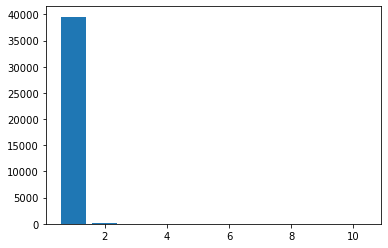

In [8]:
print_plot_distribution(data['shares'])

In [9]:
log_shares = np.log(data['shares'] + 0.0001)

Range (1): 		0.0-1.364497805068098 , 		Frequency: 1
Range (2): 		1.364497805068098-2.728995610136196 , 		Frequency: 3
Range (3): 		2.728995610136196-4.0934934152042945 , 		Frequency: 33
Range (4): 		4.0934934152042945-5.457991220272392 , 		Frequency: 167
Range (5): 		5.457991220272392-6.822489025340491 , 		Frequency: 8970
Range (6): 		6.822489025340491-8.186986830408589 , 		Frequency: 22914
Range (7): 		8.186986830408589-9.551484635476687 , 		Frequency: 6173
Range (8): 		9.551484635476687-10.915982440544784 , 		Frequency: 1217
Range (9): 		10.915982440544784-12.280480245612882 , 		Frequency: 154
Range (10): 		12.280480245612882-13.644978050680981 , 		Frequency: 11


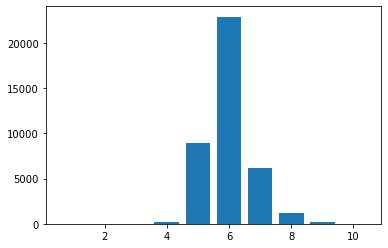

In [10]:
print_plot_distribution(log_shares)

***
### Exploration

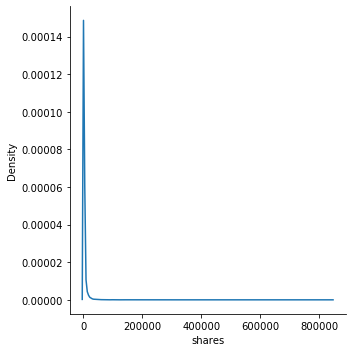

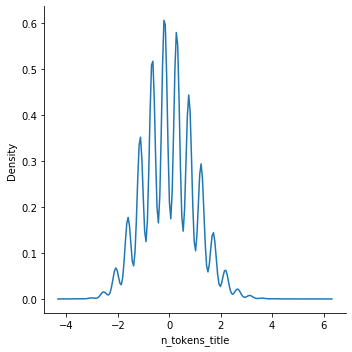

In [27]:
sns.displot(data, x='shares', kind='kde')
sns.displot(data, x='n_tokens_title', kind='kde')

In [361]:
sns.__version__

'0.10.0'

In [12]:
X = data.drop(['shares'], axis=1)
y = data['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
y_train = np.log(y_train + 0.0001)

***
### Clustering

In [264]:
# kmeans = KMeans(n_clusters=4, random_state=0).fit(X_train)

In [265]:
# print(len(X_train[kmeans.labels_ == 0]))
# print(len(X_train[kmeans.labels_ == 1]))
# print(len(X_train[kmeans.labels_ == 2]))
# print(len(X_train[kmeans.labels_ == 3]))

In [266]:
# test = kmeans.predict(X_test)

# test1 = X_test[test == 0]

In [267]:
# lin_reg_1 = LinearRegression().fit(X_train[kmeans.labels_ == 0], y_train[kmeans.labels_ == 0])

In [268]:
# y_pred_1 = lin_reg_1.predict(test1)

In [269]:
# mean_squared_error(y_test[test == 0], y_pred_1)

***
### Linear Regression

In [14]:
lin_reg = LinearRegression().fit(X_train, y_train)

In [15]:
y_pred = lin_reg.predict(X_test)

y_pred_inv = np.exp(y_pred)

In [16]:
print('MSE: {}'.format(mean_squared_error(y_test, y_pred_inv)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_inv))))

MSE: 9.527684260530249e+78
RMSE: 3.086694714501298e+39


***
### Non-linear Regression

In [17]:
svr_reg = SVR(kernel='rbf', C=1, gamma=0.1, epsilon=0.1).fit(X_train, y_train)

In [18]:
y_pred = svr_reg.predict(X_test)

y_pred_inv = np.exp(y_pred)

In [19]:
print('MSE: {}'.format(mean_squared_error(y_test, y_pred_inv)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_inv))))

MSE: 78954659.25876155
RMSE: 8885.643435270265


***
### Reading Kaggle News Extracted Feature (for testing)

In [321]:
data_kaggle_features = pd.read_csv('../data/processed/kaggle_features/kaggle_features1.csv', index_col=['id'])

In [322]:
data_kaggle_features.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity
id,,,,,,,,,,,,,,,,,,,,
0,2.833213,6.742881,0.426887,0.520047,0.338443,8.289037,0.482216,0.006777,0.024764,0.020047,0.552632,0.447368,0.291412,0.050000,0.70,-0.409314,-0.050000,-1.000000,0.000000,0.000000
1,2.197225,6.561031,0.521924,0.534653,0.417256,8.106515,0.495110,0.100880,0.032532,0.018388,0.638889,0.361111,0.365758,0.062500,0.80,-0.239744,-0.050000,-0.666667,0.100000,0.000000
2,2.079442,7.150701,0.443922,0.549804,0.381961,8.728426,0.405107,0.056258,0.032157,0.018039,0.640625,0.359375,0.323984,0.033333,0.60,-0.273973,-0.050000,-0.700000,0.000000,0.000000
3,2.397895,6.331502,0.444840,0.565836,0.352313,7.864804,0.262625,0.017497,0.021352,0.033808,0.387097,0.612903,0.348611,0.100000,0.55,-0.172682,-0.071429,-0.300000,0.107143,-0.135714
4,2.708050,5.030438,0.640523,0.581699,0.470588,6.626718,0.112500,-0.012500,0.000000,0.006536,0.000000,1.000000,0.000000,0.000000,0.00,-0.050000,-0.050000,-0.050000,0.250000,0.000000


In [349]:
kaggle_data_to_be_predicted = data_kaggle_features.iloc[20300]

kaggle_data_to_be_predicted['num_imgs'] = 1.86
kaggle_data_to_be_predicted['num_videos'] = 0
kaggle_data_to_be_predicted['weekday_is_monday'] = 0
kaggle_data_to_be_predicted['weekday_is_tuesday'] = 0
kaggle_data_to_be_predicted['weekday_is_wednesday'] = 0
kaggle_data_to_be_predicted['weekday_is_thursday'] = 1.0
kaggle_data_to_be_predicted['weekday_is_friday'] = 0
kaggle_data_to_be_predicted['weekday_is_saturday'] = 0
kaggle_data_to_be_predicted['weekday_is_sunday'] = 0

In [352]:
print(kaggle_data_to_be_predicted)

n_tokens_title                2.639057
n_tokens_content              6.813445
n_unique_tokens               0.486813
n_non_stop_words              0.546154
n_non_stop_unique_tokens      0.396703
average_token_length          8.387540
global_subjectivity           0.371655
global_sentiment_polarity     0.022622
global_rate_positive_words    0.028571
global_rate_negative_words    0.025275
rate_positive_words           0.530612
rate_negative_words           0.469388
avg_positive_polarity         0.325572
min_positive_polarity         0.062500
max_positive_polarity         0.500000
avg_negative_polarity        -0.290338
min_negative_polarity        -0.100000
max_negative_polarity        -1.000000
title_subjectivity            0.454545
title_sentiment_polarity      0.136364
num_imgs                      1.860000
num_videos                    0.000000
weekday_is_monday             0.000000
weekday_is_tuesday            0.000000
weekday_is_wednesday          0.000000
weekday_is_thursday      

In [355]:
kaggle_predicted_shares = svr_reg.predict([kaggle_data_to_be_predicted])

print(kaggle_predicted_shares)

[7.53701858]


In [334]:
print(len(data_kaggle_features))

20800
